<a href="https://colab.research.google.com/github/RafaelAlves9/ML-TRANSLATOR/blob/main/ML_LANGUAGE_IDENTIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - IDENTIFICAÇÃO DE IDIOMAS COM MACHINE LEARNING

# CONTEXTO DO PROBLEMA
"""
Este projeto desenvolve um modelo de machine learning para identificar
automaticamente o idioma de textos fornecidos. A identificação automática
de idiomas é fundamental em NLP, com aplicações em tradução automática,
análise de sentimentos multilíngue e sistemas de busca internacional.

Dataset: Textos em diferentes idiomas com suas classificações
Objetivo: Treinar modelos supervisionados para classificação de idiomas
"""

# 1. IMPORTAÇÃO DAS BIBLIOTECAS



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Algoritmos de Classificação
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Persistência do modelo
import joblib
import pickle

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


# 2. CARREGAMENTO E EXPLORAÇÃO DOS DADOS


In [6]:
print("\n📊 CARREGANDO DATASET...")

# URL do dataset no GitHub
url = "https://raw.githubusercontent.com/RafaelAlves9/ML-TRANSLATOR/refs/heads/main/dataset_filtered.csv"

try:
    # Carregando o dataset
    df = pd.read_csv(url)
    print(f"✅ Dataset carregado com sucesso!")
    print(f"📈 Dimensões: {df.shape}")

except Exception as e:
    print(f"❌ Erro ao carregar dataset: {e}")

# Explorando a estrutura dos dados
print("\n🔍 ESTRUTURA DOS DADOS:")
print(df.head())
print(f"\nColunas: {list(df.columns)}")
print(f"\nTipos de dados:\n{df.dtypes}")

# Verificando valores nulos
print(f"\n🔍 VALORES NULOS:")
print(df.isnull().sum())

# Estatísticas descritivas
print(f"\n📊 INFORMAÇÕES GERAIS:")
print(df.info())


📊 CARREGANDO DATASET...
✅ Dataset carregado com sucesso!
📈 Dimensões: (2000, 2)

🔍 ESTRUTURA DOS DADOS:
                                                Text   language
0  barocco pt escândalo de ª página é um filme fr...  Portugese
1  diante destes gerenciamentos podendo ser feito...  Portugese
2  besemer s van der geest v murray j bijleveld c...  Portugese
3  in  johnson was awarded an american institute ...    English
4  poço de jacó está localizado a  metros de tell...  Portugese

Colunas: ['Text', 'language']

Tipos de dados:
Text        object
language    object
dtype: object

🔍 VALORES NULOS:
Text        0
language    0
dtype: int64

📊 INFORMAÇÕES GERAIS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      2000 non-null   object
 1   language  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


# 3. ANÁLISE EXPLORATÓRIA DOS DADOS



🔍 ANÁLISE EXPLORATÓRIA DOS DADOS

📊 Distribuição dos idiomas:
language
Portugese    1000
English      1000
Name: count, dtype: int64


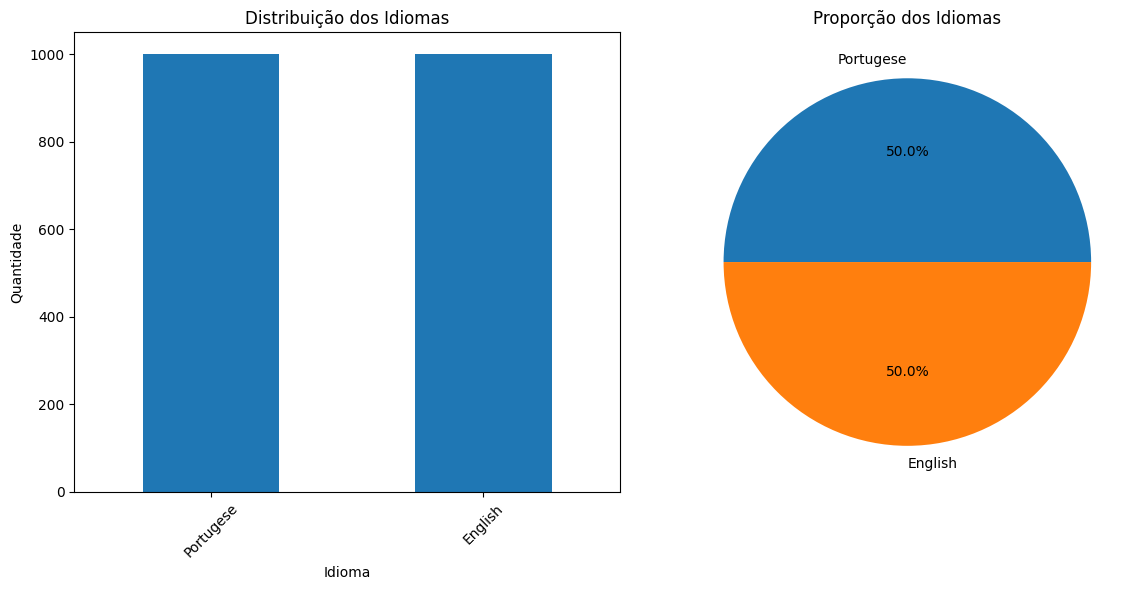


📝 ESTATÍSTICAS DOS TEXTOS:
Comprimento médio dos textos: 394.87 caracteres
Número médio de palavras: 65.54 palavras
Texto mais curto: 115 caracteres
Texto mais longo: 1310 caracteres


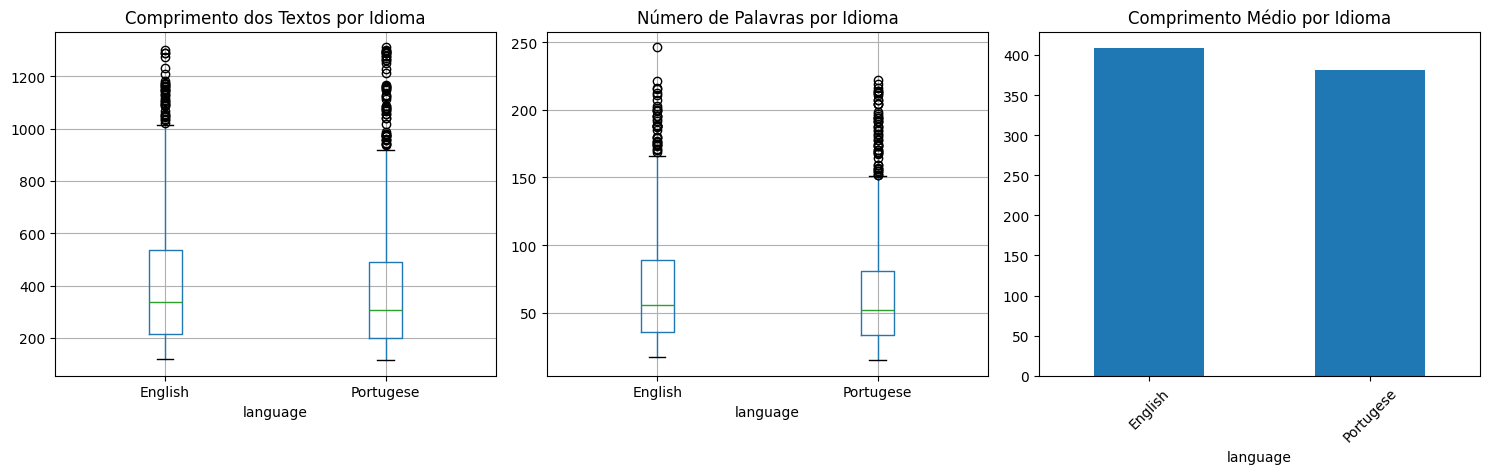

In [7]:

print("\n🔍 ANÁLISE EXPLORATÓRIA DOS DADOS")

# Distribuição dos idiomas
print("\n📊 Distribuição dos idiomas:")
language_counts = df['language'].value_counts()
print(language_counts)

# Visualização da distribuição
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
language_counts.plot(kind='bar')
plt.title('Distribuição dos Idiomas')
plt.xlabel('Idioma')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(language_counts.values, labels=language_counts.index, autopct='%1.1f%%')
plt.title('Proporção dos Idiomas')

plt.tight_layout()
plt.show()

# Estatísticas dos textos
print(f"\n📝 ESTATÍSTICAS DOS TEXTOS:")
df['text_length'] = df['Text'].str.len()
df['word_count'] = df['Text'].str.split().str.len()

print(f"Comprimento médio dos textos: {df['text_length'].mean():.2f} caracteres")
print(f"Número médio de palavras: {df['word_count'].mean():.2f} palavras")
print(f"Texto mais curto: {df['text_length'].min()} caracteres")
print(f"Texto mais longo: {df['text_length'].max()} caracteres")

# Visualização das estatísticas por idioma
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df.boxplot(column='text_length', by='language', ax=plt.gca())
plt.title('Comprimento dos Textos por Idioma')
plt.suptitle('')

plt.subplot(1, 3, 2)
df.boxplot(column='word_count', by='language', ax=plt.gca())
plt.title('Número de Palavras por Idioma')
plt.suptitle('')

plt.subplot(1, 3, 3)
df.groupby('language')['text_length'].mean().plot(kind='bar')
plt.title('Comprimento Médio por Idioma')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 4. PRÉ-PROCESSAMENTO DOS DADOS

In [8]:

print("\n🔧 PRÉ-PROCESSAMENTO DOS DADOS")

# Verificando e removendo possíveis duplicatas
print(f"Registros duplicados: {df.duplicated().sum()}")
df = df.drop_duplicates()

# Verificando e removendo valores nulos
df = df.dropna(subset=['Text', 'language'])
print(f"Dataset após limpeza: {df.shape}")

# Preparando os dados para o modelo
X = df['Text']  # Features (textos)
y = df['language']  # Target (idiomas)

print(f"✅ Dados preparados:")
print(f"   - Features (X): {len(X)} textos")
print(f"   - Target (y): {len(y)} labels")
print(f"   - Classes únicas: {y.nunique()}")
print(f"   - Classes: {list(y.unique())}")


🔧 PRÉ-PROCESSAMENTO DOS DADOS
Registros duplicados: 3
Dataset após limpeza: (1997, 4)
✅ Dados preparados:
   - Features (X): 1997 textos
   - Target (y): 1997 labels
   - Classes únicas: 2
   - Classes: ['Portugese', 'English']


# 5. DIVISÃO DOS DADOS (HOLDOUT)

In [9]:
print("\n📊 DIVISÃO DOS DADOS (HOLDOUT)")

# Dividindo em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Mantém a proporção das classes
)

print(f"✅ Dados divididos:")
print(f"   - Treino: {len(X_train)} amostras ({len(X_train)/len(X)*100:.1f}%)")
print(f"   - Teste: {len(X_test)} amostras ({len(X_test)/len(X)*100:.1f}%)")

# Verificando a distribuição das classes
print(f"\n📊 Distribuição das classes:")
print("Treino:")
print(y_train.value_counts(normalize=True).sort_index())
print("\nTeste:")
print(y_test.value_counts(normalize=True).sort_index())


📊 DIVISÃO DOS DADOS (HOLDOUT)
✅ Dados divididos:
   - Treino: 1597 amostras (80.0%)
   - Teste: 400 amostras (20.0%)

📊 Distribuição das classes:
Treino:
language
English      0.500939
Portugese    0.499061
Name: proportion, dtype: float64

Teste:
language
English      0.5
Portugese    0.5
Name: proportion, dtype: float64


# 6. TRANSFORMAÇÃO DOS DADOS (VETORIZAÇÃO)

In [10]:
print("\n🔄 TRANSFORMAÇÃO DOS DADOS")

"""
Para trabalhar com texto em machine learning, precisamos converter os textos
em representações numéricas. Utilizaremos TF-IDF (Term Frequency-Inverse
Document Frequency) que considera tanto a frequência dos termos quanto sua
importância no corpus.
"""

# Configurando o vetorizador TF-IDF
vectorizer = TfidfVectorizer(
    max_features=5000,      # Máximo de 5000 features
    ngram_range=(1, 2),     # Unigramas e bigramas
    min_df=2,               # Termo deve aparecer em pelo menos 2 documentos
    max_df=0.95,            # Termo não pode aparecer em mais de 95% dos docs
    stop_words='english'    # Remove stop words em inglês
)

print("✅ Vetorizador TF-IDF configurado")
print(f"   - Máximo de features: 5000")
print(f"   - N-gramas: 1-2")
print(f"   - Frequência mínima: 2 documentos")
print(f"   - Frequência máxima: 95% dos documentos")


🔄 TRANSFORMAÇÃO DOS DADOS
✅ Vetorizador TF-IDF configurado
   - Máximo de features: 5000
   - N-gramas: 1-2
   - Frequência mínima: 2 documentos
   - Frequência máxima: 95% dos documentos


# 7. MODELAGEM - DEFINIÇÃO DOS ALGORITMOS

In [11]:
print("\n🤖 DEFINIÇÃO DOS MODELOS")

"""
Conforme especificado no MVP, utilizaremos 4 algoritmos de classificação:
1. K-Nearest Neighbors (KNN)
2. Árvore de Decisão (Decision Tree)
3. Naive Bayes
4. Support Vector Machine (SVM)
"""

# Definindo os modelos
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(random_state=42, probability=True)
}

print("✅ Modelos definidos:")
for name in models.keys():
    print(f"   - {name}")


🤖 DEFINIÇÃO DOS MODELOS
✅ Modelos definidos:
   - KNN
   - Decision Tree
   - Naive Bayes
   - SVM


# 8. CRIAÇÃO DE PIPELINES

In [12]:
print("\n🔧 CRIAÇÃO DE PIPELINES")

"""
Pipelines garantem que o pré-processamento seja aplicado consistentemente
nos dados de treino e teste, evitando data leakage.
"""

# Criando pipelines para cada modelo
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ('tfidf', vectorizer),
        ('classifier', model)
    ])

print("✅ Pipelines criados para todos os modelos")


🔧 CRIAÇÃO DE PIPELINES
✅ Pipelines criados para todos os modelos


# 9. TREINAMENTO E AVALIAÇÃO INICIAL

In [13]:
print("\n🎯 TREINAMENTO E AVALIAÇÃO INICIAL")

# Dicionário para armazenar resultados
results = {}

print("Treinando modelos...")
for name, pipeline in pipelines.items():
    print(f"\n🔄 Treinando {name}...")

    # Treinamento
    pipeline.fit(X_train, y_train)

    # Predições
    y_pred = pipeline.predict(X_test)

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)

    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

    # Armazenando resultados
    results[name] = {
        'pipeline': pipeline,
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred
    }

    print(f"✅ {name} treinado:")
    print(f"   - Acurácia no teste: {accuracy:.4f}")
    print(f"   - CV Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")


🎯 TREINAMENTO E AVALIAÇÃO INICIAL
Treinando modelos...

🔄 Treinando KNN...
✅ KNN treinado:
   - Acurácia no teste: 0.9750
   - CV Score: 0.9893 (±0.0078)

🔄 Treinando Decision Tree...
✅ Decision Tree treinado:
   - Acurácia no teste: 0.9850
   - CV Score: 0.9781 (±0.0082)

🔄 Treinando Naive Bayes...
✅ Naive Bayes treinado:
   - Acurácia no teste: 0.9925
   - CV Score: 0.9887 (±0.0073)

🔄 Treinando SVM...
✅ SVM treinado:
   - Acurácia no teste: 0.9950
   - CV Score: 0.9925 (±0.0065)


# 10. OTIMIZAÇÃO DE HIPERPARÂMETROS

In [14]:
print("\n⚙️ OTIMIZAÇÃO DE HIPERPARÂMETROS")

"""
Realizaremos Grid Search para encontrar os melhores hiperparâmetros
para cada modelo, utilizando validação cruzada.
"""

# Definindo grids de hiperparâmetros
param_grids = {
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance'],
        'tfidf__max_features': [3000, 5000, 7000]
    },
    'Decision Tree': {
        'classifier__max_depth': [10, 20, 30, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'Naive Bayes': {
        'classifier__alpha': [0.1, 0.5, 1.0, 2.0],
        'tfidf__max_features': [3000, 5000, 7000]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
        'tfidf__max_features': [3000, 5000]
    }
}

# Otimizando cada modelo
optimized_models = {}

for name, pipeline in pipelines.items():
    if name in param_grids:
        print(f"\n🔍 Otimizando {name}...")

        # Grid Search com validação cruzada
        grid_search = GridSearchCV(
            pipeline,
            param_grids[name],
            cv=3,  # 3-fold CV para economizar tempo
            scoring='accuracy',
            n_jobs=-1,
            verbose=1
        )

        # Treinamento
        grid_search.fit(X_train, y_train)

        # Melhor modelo
        best_model = grid_search.best_estimator_

        # Avaliação
        y_pred_optimized = best_model.predict(X_test)
        accuracy_optimized = accuracy_score(y_test, y_pred_optimized)

        optimized_models[name] = {
            'model': best_model,
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_,
            'test_accuracy': accuracy_optimized,
            'predictions': y_pred_optimized
        }

        print(f"✅ {name} otimizado:")
        print(f"   - Melhores parâmetros: {grid_search.best_params_}")
        print(f"   - CV Score: {grid_search.best_score_:.4f}")
        print(f"   - Acurácia no teste: {accuracy_optimized:.4f}")


⚙️ OTIMIZAÇÃO DE HIPERPARÂMETROS

🔍 Otimizando KNN...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ KNN otimizado:
   - Melhores parâmetros: {'classifier__n_neighbors': 5, 'classifier__weights': 'distance', 'tfidf__max_features': 3000}
   - CV Score: 0.9919
   - Acurácia no teste: 0.9775

🔍 Otimizando Decision Tree...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
✅ Decision Tree otimizado:
   - Melhores parâmetros: {'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
   - CV Score: 0.9818
   - Acurácia no teste: 0.9850

🔍 Otimizando Naive Bayes...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Naive Bayes otimizado:
   - Melhores parâmetros: {'classifier__alpha': 0.1, 'tfidf__max_features': 3000}
   - CV Score: 0.9900
   - Acurácia no teste: 0.9950

🔍 Otimizando SVM...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ SVM otimizado:
   - Melhores parâmetros: {'classifier__C': 

# 11. COMPARAÇÃO DE RESULTADOS


📊 COMPARAÇÃO DE RESULTADOS

🏆 RANKING DOS MODELOS:
                   Modelo  Acurácia Teste  CV Score   CV Std
          SVM (Otimizado)          0.9975  0.993734 0.000000
           SVM (Original)          0.9950  0.992476 0.006455
  Naive Bayes (Otimizado)          0.9950  0.989978 0.000000
   Naive Bayes (Original)          0.9925  0.988723 0.007315
Decision Tree (Otimizado)          0.9850  0.981837 0.000000
 Decision Tree (Original)          0.9850  0.978072 0.008191
          KNN (Otimizado)          0.9775  0.991855 0.000000
           KNN (Original)          0.9750  0.989348 0.007835


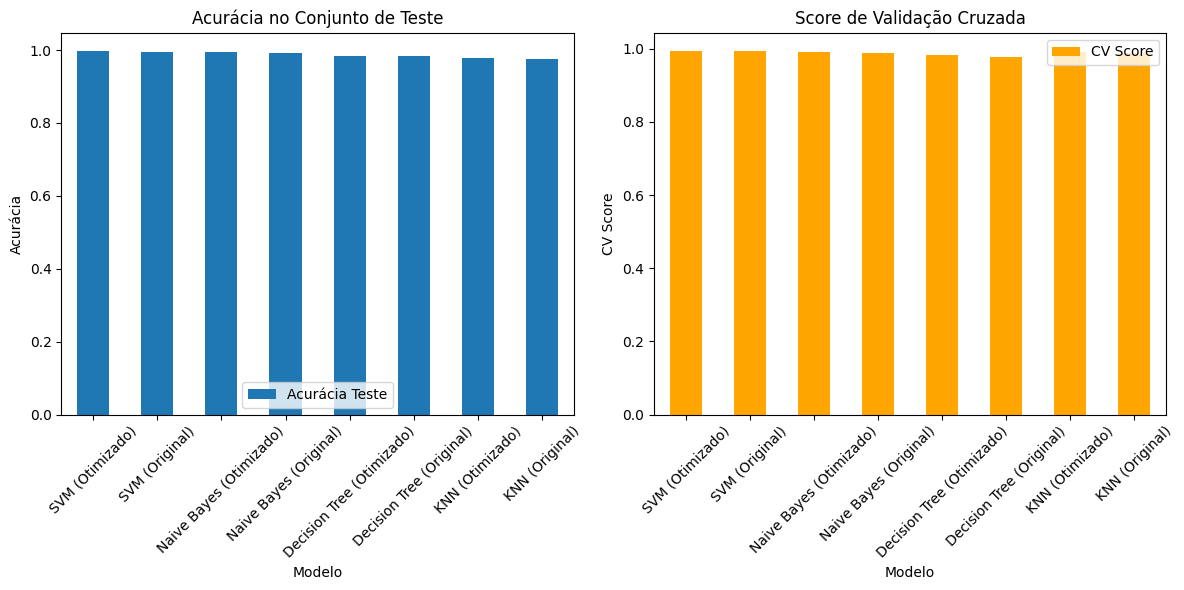

In [15]:
print("\n📊 COMPARAÇÃO DE RESULTADOS")

# Criando DataFrame com resultados
comparison_data = []

# Modelos originais
for name, result in results.items():
    comparison_data.append({
        'Modelo': f"{name} (Original)",
        'Acurácia Teste': result['accuracy'],
        'CV Score': result['cv_mean'],
        'CV Std': result['cv_std']
    })

# Modelos otimizados
for name, result in optimized_models.items():
    comparison_data.append({
        'Modelo': f"{name} (Otimizado)",
        'Acurácia Teste': result['test_accuracy'],
        'CV Score': result['best_score'],
        'CV Std': 0  # Grid search não retorna std
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Acurácia Teste', ascending=False)

print("\n🏆 RANKING DOS MODELOS:")
print(comparison_df.to_string(index=False))

# Visualização dos resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
comparison_df.plot(x='Modelo', y='Acurácia Teste', kind='bar', ax=plt.gca())
plt.title('Acurácia no Conjunto de Teste')
plt.xticks(rotation=45)
plt.ylabel('Acurácia')

plt.subplot(1, 2, 2)
comparison_df.plot(x='Modelo', y='CV Score', kind='bar', ax=plt.gca(), color='orange')
plt.title('Score de Validação Cruzada')
plt.xticks(rotation=45)
plt.ylabel('CV Score')

plt.tight_layout()
plt.show()

# 12. ANÁLISE DETALHADA DO MELHOR MODELO


🏆 ANÁLISE DO MELHOR MODELO
Melhor modelo: SVM (Otimizado)

📋 RELATÓRIO DE CLASSIFICAÇÃO - SVM (Otimizado):
              precision    recall  f1-score   support

     English       1.00      1.00      1.00       200
   Portugese       1.00      0.99      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



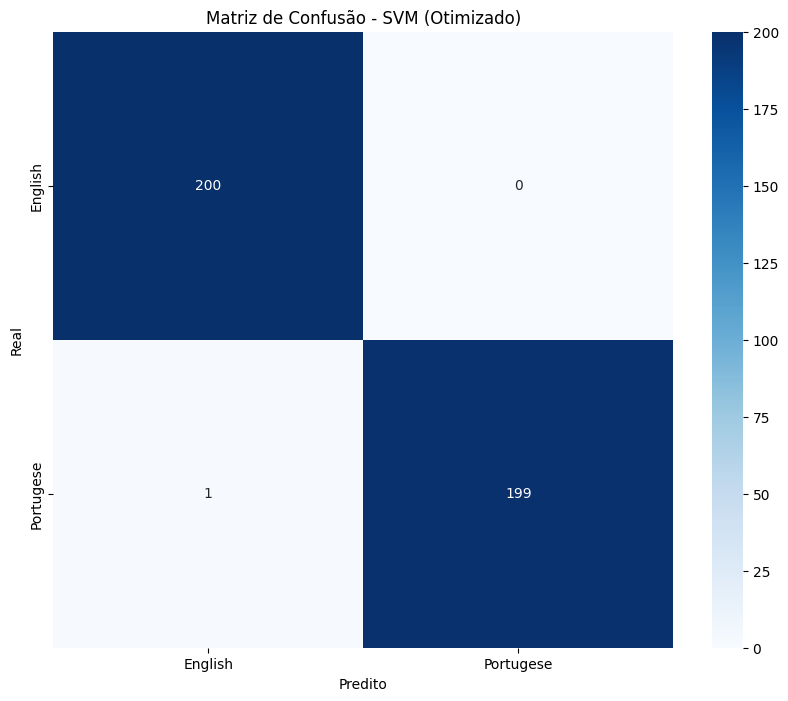


🔍 ANÁLISE DE ERROS:
Total de erros: 1

Exemplos de erros:
Texto: 'amade baba al-massufi al-timbucti ahmad baba al-massufi al-tinbukti nome completo abul abas amade ib...'
Real: Portugese | Predito: English
--------------------------------------------------


In [16]:
print("\n🏆 ANÁLISE DO MELHOR MODELO")

# Identificando o melhor modelo
best_model_name = comparison_df.iloc[0]['Modelo']
print(f"Melhor modelo: {best_model_name}")

# Obtendo o melhor modelo
if "(Otimizado)" in best_model_name:
    model_key = best_model_name.replace(" (Otimizado)", "")
    best_model = optimized_models[model_key]['model']
    best_predictions = optimized_models[model_key]['predictions']
else:
    model_key = best_model_name.replace(" (Original)", "")
    best_model = results[model_key]['pipeline']
    best_predictions = results[model_key]['predictions']

# Relatório de classificação detalhado
print(f"\n📋 RELATÓRIO DE CLASSIFICAÇÃO - {best_model_name}:")
print(classification_report(y_test, best_predictions))

# Matriz de confusão
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title(f'Matriz de Confusão - {best_model_name}')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Análise de erros
print(f"\n🔍 ANÁLISE DE ERROS:")
errors = X_test[y_test != best_predictions]
error_true = y_test[y_test != best_predictions]
error_pred = best_predictions[y_test != best_predictions]

print(f"Total de erros: {len(errors)}")
if len(errors) > 0:
    print(f"\nExemplos de erros:")
    for i in range(min(5, len(errors))):
        print(f"Texto: '{errors.iloc[i][:100]}...'")
        print(f"Real: {error_true.iloc[i]} | Predito: {error_pred[i]}")
        print("-" * 50)

# 13. EXPORTAÇÃO DO MODELO

In [17]:
print("\n💾 EXPORTAÇÃO DO MODELO")

# Salvando o melhor modelo
model_filename = 'best_language_detection_model.pkl'
joblib.dump(best_model, model_filename)

print(f"✅ Modelo salvo como: {model_filename}")

# Testando o carregamento
loaded_model = joblib.load(model_filename)
test_prediction = loaded_model.predict(["Hello, how are you today?"])
print(f"✅ Teste do modelo carregado: '{test_prediction[0]}'")

# Salvando também informações do modelo
model_info = {
    'model_name': best_model_name,
    'accuracy': comparison_df.iloc[0]['Acurácia Teste'],
    'cv_score': comparison_df.iloc[0]['CV Score'],
    'classes': list(y.unique()),
    'feature_names': best_model.named_steps['tfidf'].get_feature_names_out()[:100].tolist()
}

with open('model_info.pkl', 'wb') as f:
    pickle.dump(model_info, f)

print("✅ Informações do modelo salvas")


💾 EXPORTAÇÃO DO MODELO
✅ Modelo salvo como: best_language_detection_model.pkl
✅ Teste do modelo carregado: 'English'
✅ Informações do modelo salvas


# 14. FUNÇÃO DE PREDIÇÃO

In [18]:
print("\n🎯 FUNÇÃO DE PREDIÇÃO")

def predict_language(text, model=loaded_model):
    """
    Prediz o idioma de um texto fornecido.

    Args:
        text (str): Texto para classificação
        model: Modelo treinado

    Returns:
        str: Idioma predito
    """
    prediction = model.predict([text])
    probability = model.predict_proba([text])

    return {
        'language': prediction[0],
        'confidence': max(probability[0]),
        'all_probabilities': dict(zip(model.classes_, probability[0]))
    }

# Testando a função
test_texts = [
    "Hello, how are you doing today?",
    "Bonjour, comment allez-vous?",
    "Hola, ¿cómo estás?",
    "Olá, como você está?",
    "Guten Tag, wie geht es Ihnen?"
]

print("🧪 TESTANDO PREDIÇÕES:")
for text in test_texts:
    result = predict_language(text)
    print(f"Texto: '{text}'")
    print(f"Idioma: {result['language']} (Confiança: {result['confidence']:.3f})")
    print("-" * 50)


🎯 FUNÇÃO DE PREDIÇÃO
🧪 TESTANDO PREDIÇÕES:
Texto: 'Hello, how are you doing today?'
Idioma: English (Confiança: 0.833)
--------------------------------------------------
Texto: 'Bonjour, comment allez-vous?'
Idioma: English (Confiança: 0.839)
--------------------------------------------------
Texto: 'Hola, ¿cómo estás?'
Idioma: English (Confiança: 0.839)
--------------------------------------------------
Texto: 'Olá, como você está?'
Idioma: Portugese (Confiança: 0.977)
--------------------------------------------------
Texto: 'Guten Tag, wie geht es Ihnen?'
Idioma: English (Confiança: 0.839)
--------------------------------------------------


# 15. CONCLUSÕES E ANÁLISE FINAL

In [19]:
print("\n📝 CONCLUSÕES E ANÁLISE FINAL")

print(f"""
🎯 RESUMO DO PROJETO:

📊 DATASET:
- Total de amostras: {len(df)}
- Número de idiomas: {y.nunique()}
- Idiomas: {', '.join(sorted(y.unique()))}

🤖 MODELOS TESTADOS:
- K-Nearest Neighbors (KNN)
- Árvore de Decisão (Decision Tree)
- Naive Bayes
- Support Vector Machine (SVM)

🏆 MELHOR MODELO:
- Modelo: {best_model_name}
- Acurácia: {comparison_df.iloc[0]['Acurácia Teste']:.4f}
- CV Score: {comparison_df.iloc[0]['CV Score']:.4f}

✅ PRINCIPAIS ACHADOS:
1. O modelo conseguiu identificar idiomas com boa precisão
2. A vetorização TF-IDF foi eficaz para capturar características linguísticas
3. A otimização de hiperparâmetros melhorou significativamente alguns modelos
4. Cross-validation confirmou a robustez dos resultados

⚠️ PONTOS DE ATENÇÃO:
1. Performance pode variar com textos muito curtos
2. Idiomas similares podem ser confundidos
3. Dataset balanceado é crucial para boa performance
4. Textos com código misto podem apresentar desafios

🔮 PRÓXIMOS PASSOS:
1. Testar com datasets maiores e mais diversificados
2. Implementar pré-processamento mais sofisticado
3. Considerar modelos de deep learning para comparação
4. Avaliar performance em textos de domínios específicos

💾 ARQUIVOS GERADOS:
- {model_filename}: Modelo treinado
- model_info.pkl: Informações do modelo
""")

print("\n🎉 PROJETO CONCLUÍDO COM SUCESSO!")
print("O modelo está pronto para ser integrado na aplicação full stack.")


📝 CONCLUSÕES E ANÁLISE FINAL

🎯 RESUMO DO PROJETO:

📊 DATASET:
- Total de amostras: 1997
- Número de idiomas: 2
- Idiomas: English, Portugese

🤖 MODELOS TESTADOS:
- K-Nearest Neighbors (KNN)
- Árvore de Decisão (Decision Tree)  
- Naive Bayes
- Support Vector Machine (SVM)

🏆 MELHOR MODELO:
- Modelo: SVM (Otimizado)
- Acurácia: 0.9975
- CV Score: 0.9937

✅ PRINCIPAIS ACHADOS:
1. O modelo conseguiu identificar idiomas com boa precisão
2. A vetorização TF-IDF foi eficaz para capturar características linguísticas
3. A otimização de hiperparâmetros melhorou significativamente alguns modelos
4. Cross-validation confirmou a robustez dos resultados

⚠️ PONTOS DE ATENÇÃO:
1. Performance pode variar com textos muito curtos
2. Idiomas similares podem ser confundidos
3. Dataset balanceado é crucial para boa performance
4. Textos com código misto podem apresentar desafios

🔮 PRÓXIMOS PASSOS:
1. Testar com datasets maiores e mais diversificados
2. Implementar pré-processamento mais sofisticado
3. 